In [355]:
import pandas as pd

In [356]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [357]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [358]:
df.shape

(5572, 5)

### step 1 is data cleaning 

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [360]:
# in unnamed clm 2 ,3,4 have a large amount of null value so drop it 

In [361]:
# df.iloc[:,2:]
df.drop(columns=df.iloc[:,2:],inplace=True)

In [362]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [363]:
# rename the clm 
df.rename(columns={'v1':'output','v2':'msg'},inplace=True)

In [364]:
df.head()

,output,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [441]:
df['msg'][4]

"nah i don't think he goes to usf, he lives around here though"

In [365]:
df['output'].value_counts()
# labelling the data 

output
ham     4825
spam     747
Name: count, dtype: int64

In [366]:
def label(text):
    if text=='ham':
        return 0
    return 1    

In [367]:
df['output']=df['output'].apply(label)

In [368]:
df.head()

,output,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### cheack duplicates values

In [369]:
print(df.duplicated().sum())
print(df[df.duplicated()])

403
      output                                                msg
102        0  As per your request 'Melle Melle (Oru Minnamin...
153        0  As per your request 'Melle Melle (Oru Minnamin...
206        0  As I entered my cabin my PA said, '' Happy B'd...
222        0                             Sorry, I'll call later
325        0                   No calls..messages..missed calls
...      ...                                                ...
5524       1  You are awarded a SiPix Digital Camera! call 0...
5535       0  I know you are thinkin malaria. But relax, chi...
5539       0                         Just sleeping..and surfing
5553       0                        Hahaha..use your brain dear
5558       0                             Sorry, I'll call later

[403 rows x 2 columns]


In [370]:
#  remove duplicates
df.drop_duplicates(inplace=True)

In [371]:
df.duplicated().sum()

np.int64(0)

In [372]:
df.shape

(5169, 2)

## EDA 

In [373]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x20ddec31e50>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

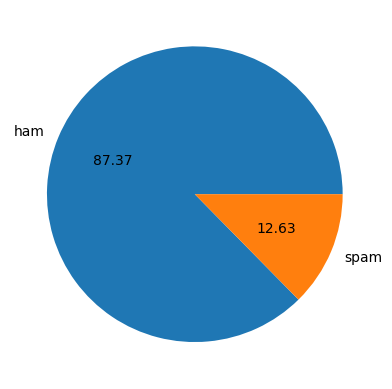

In [374]:
plt.pie(df['output'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

##  data is imbalenced 

In [375]:
# create a 3 features 
# 1 : number of symbolls 
# 2 : number of charecters 
# 3 : number of sentences in msg 

In [376]:
import nltk

In [377]:
# number of characters in msg 
df['num_char']=df['msg'].apply(len)

In [378]:
df.head()

,output,msg,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [379]:
# import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [380]:
df['num_of_words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [381]:
df.head()

,output,msg,num_char,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [382]:
# count number of sentences
df['num_of_sentence']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [383]:
df.head()

,output,msg,num_char,num_of_words,num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [384]:
# what is in data 

In [385]:
df.iloc[:,2:].describe()

,num_char,num_of_words,num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [386]:
df[df['output']==0].iloc[:,2:].describe()

,num_char,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [387]:
df[df['output']==1].iloc[:,2:].describe()

,num_char,num_of_words,num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [388]:
#  analysis of data using histogram 
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

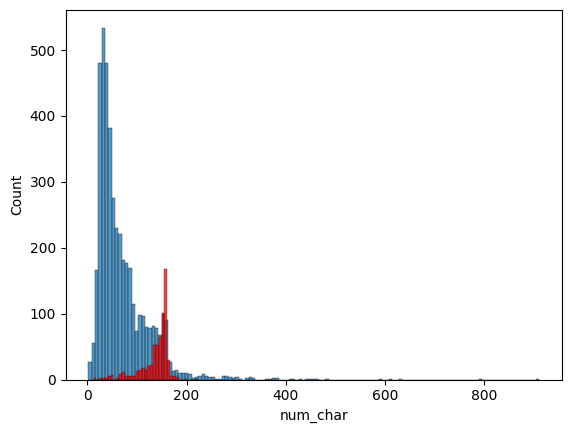

In [389]:
sns.histplot(df[df['output']==0]['num_char'])
sns.histplot(df[df['output']==1]['num_char'],color='red')

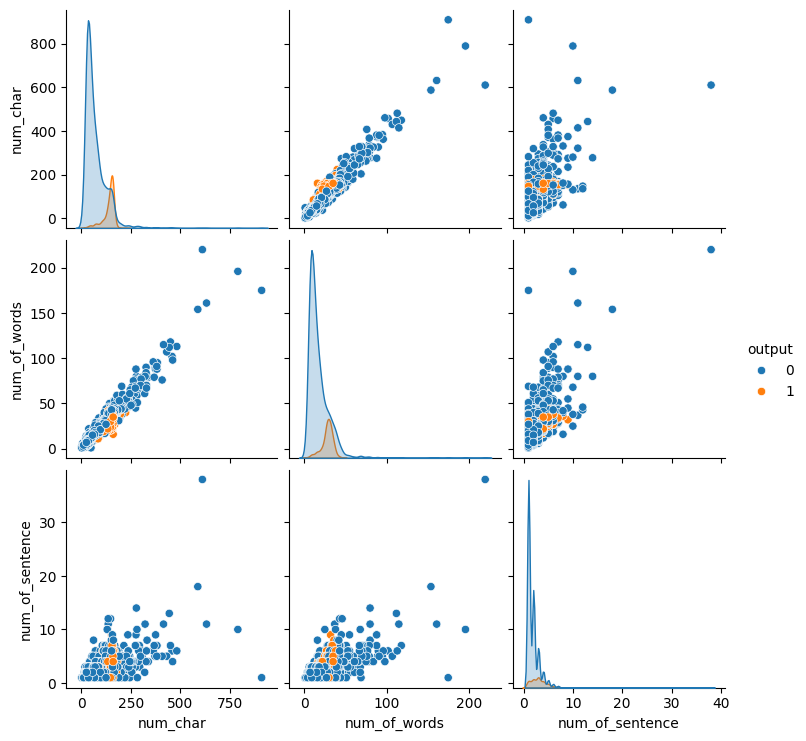

In [390]:
# see the relation of each clm with output 
sns.pairplot(df,hue='output')

<Axes: >

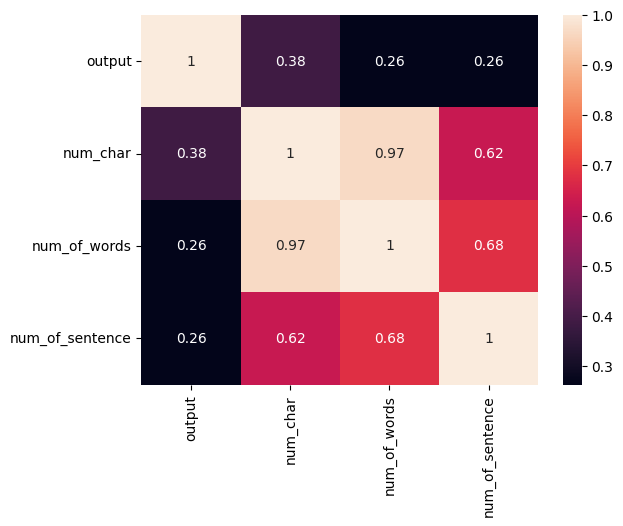

In [391]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

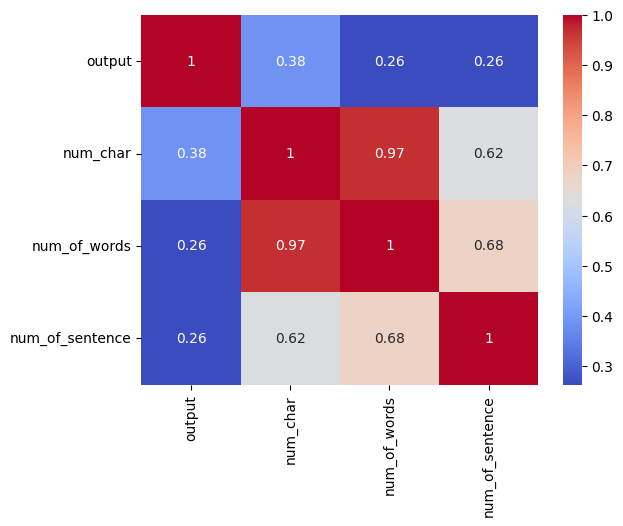

In [392]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## data preprocessing 
#### 1: to lower case 
#### 2: tokenized 
#### 3: removing special character
#### 4: remove stop word and punctuation 
#### 5: steaming 

In [393]:
df['msg']=df['msg'].str.lower()

In [394]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [395]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [396]:
# steaming 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('moving')

'move'

In [397]:
def transform_text(msg):
    msg=nltk.word_tokenize(msg) # all words convert into a list, eg ['free', 'entry', in]
    y=[]
    for i in msg:
        if i.isalnum(): # remove all special character
            y.append(i)
    msg=y[:]
    y.clear()
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    msg=y[:]
    y.clear()
    for i in msg:
        y.append(ps.stem(i))   
    return " ".join(y)

In [398]:
df['transform_msg']=df['msg'].apply(transform_text)

In [399]:
# get a top 30 word 

In [400]:
from collections import Counter

In [401]:
spam_corpus=[]
for i in df[df['output']==1]['transform_msg'].to_list():
    for j in i.split():
        spam_corpus.append(j)
    

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

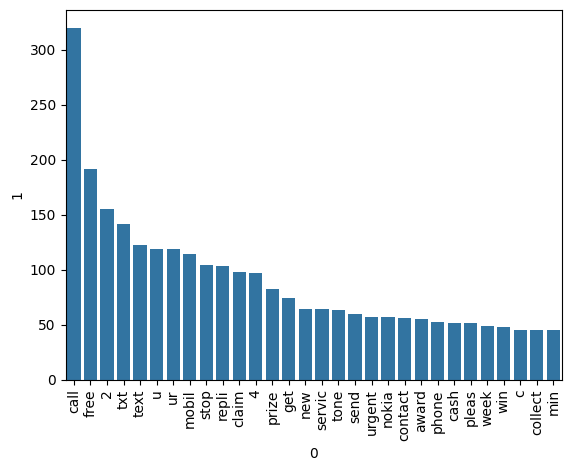

In [402]:
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation='vertical')

In [403]:
# pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

 ## Model Building 

### vsctorized the msg 

In [404]:
from sklearn.feature_extraction.text import CountVectorizer

In [405]:
cv=CountVectorizer()

In [406]:
X=cv.fit_transform(df['transform_msg']).toarray()

In [407]:
y=df['output'].values

In [408]:
from sklearn.model_selection import train_test_split

In [409]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [410]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

### modelbuild using naive bayes 

In [411]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [412]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [413]:
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [414]:
y_pred=gnb.predict(X_test)

In [415]:
print("accuracy_score  ",accuracy_score(y_test,y_pred))
print("confusion_matrix \n ",confusion_matrix(y_test,y_pred))
print("precision_score ",precision_score(y_test,y_pred))

accuracy_score   0.8684719535783365
confusion_matrix 
  [[772 117]
 [ 19 126]]
precision_score  0.5185185185185185


In [416]:
# prediction using bernoulli
bnb.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [417]:
y_pred=bnb.predict(X_test)

In [418]:
print("Bernoulli NB ")
print("accuracy_score  ",accuracy_score(y_test,y_pred))
print("confusion_matrix \n ",confusion_matrix(y_test,y_pred))
print("precision_score ",precision_score(y_test,y_pred))

Bernoulli NB 
accuracy_score   0.9661508704061895
confusion_matrix 
  [[885   4]
 [ 31 114]]
precision_score  0.9661016949152542


In [419]:
mnb.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [420]:
y_pred=mnb.predict(X_test)

In [421]:
print("Multinomial NB ")
print("accuracy_score  ",accuracy_score(y_test,y_pred))
print("confusion_matrix \n ",confusion_matrix(y_test,y_pred))
print("precision_score ",precision_score(y_test,y_pred))

Multinomial NB 
accuracy_score   0.9738878143133463
confusion_matrix 
  [[872  17]
 [ 10 135]]
precision_score  0.8881578947368421


In [422]:
# use another vectorized technique
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [423]:
tfidf=TfidfVectorizer(max_features=3000)

In [424]:
x=tfidf.fit_transform(df['transform_msg']).toarray()

In [425]:
# add some feature and cheack accuracy is improve or not 4
# x=np.hstack((x,df['num_char'].values.reshape(-1,1))) no any advantage to add a num_char 

In [426]:
y=df['output'].values

In [427]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [428]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("accuracy_score  ",accuracy_score(y_test,y_pred1))
print("confusion_matrix \n ",confusion_matrix(y_test,y_pred1))
print("precision_score ",precision_score(y_test,y_pred1))

accuracy_score   0.8626692456479691
confusion_matrix 
  [[771 118]
 [ 24 121]]
precision_score  0.5062761506276151


In [429]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy_score  ",accuracy_score(y_test,y_pred2))
print("confusion_matrix \n ",confusion_matrix(y_test,y_pred2))
print("precision_score ",precision_score(y_test,y_pred2))

accuracy_score   0.9729206963249516
confusion_matrix 
  [[888   1]
 [ 27 118]]
precision_score  0.9915966386554622


In [430]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print("accuracy_score  ",accuracy_score(y_test,y_pred3))
print("confusion_matrix \n ",confusion_matrix(y_test,y_pred3))
print("precision_score ",precision_score(y_test,y_pred3))

accuracy_score   0.9729206963249516
confusion_matrix 
  [[884   5]
 [ 23 122]]
precision_score  0.9606299212598425


In [431]:
# whos pression score is better select this one 

In [432]:
# fidf -> mnb select it 

In [433]:
import pickle

In [435]:
pickle.dump(tfidf,open('vectorized.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))